In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import os
import pickle
import glob
from scipy import stats
%matplotlib inline
import random

In [2]:
gain = lambda Wb,R,NPE,e:Wb/(NPE*e*R)
NumofPE=lambda Wb,R,g,e:Wb/(R*g*e)

def PickleITDump(data,fileName):
    with open(fileName,'wb') as f:
        pickle.dump(data,f)
        
def PickleITRead(fileName):
    
    with open(fileName,'rb') as f:
        data=pickle.load(f)
    return data

def getValuesWithSource(files,weight):
    values={} 

    for i in files:
        count=0
        sources={}
        with open(i) as f:
            next(f)
            lines=f.readlines()
            for line in lines:
                splitline=line.split(",")
                if(splitline[0] in values.keys()):
                    if(splitline[1] in values[splitline[0]].keys()):
                        values[splitline[0]][splitline[1]]=np.append(values[splitline[0]][splitline[1]],round(int(splitline[2])/weight))
                    else:
                        sources[splitline[1]]=np.array(round(int(splitline[2])/weight))
                        values[splitline[0]][splitline[1]]=sources[splitline[1]]
                else:
                    sources={}
                    sources[splitline[1]]=np.array(round(int(splitline[2])/weight))
                    values[splitline[0]]=sources
        f.close()
        
    return values
### Photons

## point Source
Point_SolidAngle=lambda r,R:(r**2/(4*R**2))

## Disk Source
Disk_SolidAngle=lambda A,B:(B**2/4)*(1-3/4*(A**2+B**2)+15/8*(1/3*(A**4+B**4)+(A*B)**2)-35/16*(1/4*(A**6+B**6)+3/2*(A*B)**2*(A**2+B**2)))

        


In [3]:
### Gains ###
IlkersGains=[3.9e6,2.6e6]
NicksGains=[3.4e6,2.2e6]

In [4]:
## Obtain the Data
Area=PickleITRead("Area.p")

## Obtain Sim Data
SimData=PickleITRead("Sim.p")


In [5]:
##### Needle Only
#S2_NeedleOnlyPath="/media/ilker/Ilker/SimResults/Sep_28_2022/NeedleOnly/counts_1000/Photon_*.txt"
#S2_NeedleOnlyFiles = glob.glob(S2_NeedleOnlyPath,recursive=True)
#S2_NeedleOnly=getValuesWithSource(S2_NeedleOnlyFiles,1)




#S2_NeedleOnlyInfoPath="/media/ilker/Ilker/SimResults/Sep_28_2022/NeedleOnly/counts_1000/Extra_*.txt"
#S2_infoNeedleOnlyFiles = glob.glob(S2_NeedleOnlyInfoPath,recursive=True)
#S2_info_NeedleOnly=getValuesWithSource(S2_infoNeedleOnlyFiles,1)


### With Needle + Collimator
#S2_NeedleCollimPath="/media/ilker/Ilker/SimResults/Sep_28_2022/Collimator/counts/Photon_*.txt"
#S2_NeedleCollimFiles = glob.glob(S2_NeedleCollimPath,recursive=True)
#S2_NeedleCollim=getValuesWithSource(S2_NeedleCollimFiles,1)


#S2_NeedleCollimInfoPath="/media/ilker/Ilker/SimResults/Sep_28_2022/Collimator/counts/Extra_*.txt"
#S2_NeedleCollimInfoFiles = glob.glob(S2_NeedleCollimInfoPath,recursive=True)
#S2_info_NeedleCollim=getValuesWithSource(S2_NeedleCollimInfoFiles,1)

In [6]:
#values={"Needle":S2_NeedleOnly,
#        "NeedleInfo":S2_info_NeedleOnly,
#        "NeedleColim":S2_NeedleCollim,
#        "NeedleColimInfo":S2_info_NeedleCollim}
#PickleITDump(values,"Sim.p")

In [7]:
### PMT Gains Ilker
Day1_PMT1_GainIL=NumofPE(Area["Day1_Ch1Area_PMT1"],50,IlkersGains[0],1.62e-19)
Day1_PMT3_GainIL=NumofPE(Area["Day1_Ch2Area_PMT3"],50,IlkersGains[1],1.62e-19)
Day2_PMT1_GainIL=NumofPE(Area["Day2_Ch1Area_PMT1"],50,IlkersGains[0],1.62e-19)
Day2_PMT3_GainIL=NumofPE(Area["Day2_Ch2Area_PMT3"],50,IlkersGains[1],1.62e-19)

### PMT Gains Nick
Day1_PMT1_GainNk=NumofPE(Area["Day1_Ch1Area_PMT1"],50,NicksGains[0],1.62e-19)
Day1_PMT3_GainNk=NumofPE(Area["Day1_Ch2Area_PMT3"],50,NicksGains[1],1.62e-19)
Day2_PMT1_GainNk=NumofPE(Area["Day2_Ch1Area_PMT1"],50,NicksGains[0],1.62e-19)
Day2_PMT3_GainNk=NumofPE(Area["Day2_Ch2Area_PMT3"],50,NicksGains[1],1.62e-19)

In [9]:
### PMT1 and PMT3

Po210_Smeared=np.random.normal(SimData["Needle"]["S1_PHOTOCATHODE"]["Po210"],SimData["Needle"]["S1_PHOTOCATHODE"]["Po210"]*0.14)
Bi210_Smeared=np.random.normal(SimData["Needle"]["S1_PHOTOCATHODE"]["Bi210"],SimData["Needle"]["S1_PHOTOCATHODE"]["Bi210"]*0.14)

Po210_SmearedPMT3=np.random.normal(SimData["Needle"]["S2_PHOTOCATHODE"]["Po210"],SimData["Needle"]["S2_PHOTOCATHODE"]["Po210"]*0.14)
Bi210_SmearedPMT3=np.random.normal(SimData["Needle"]["S2_PHOTOCATHODE"]["Bi210"],SimData["Needle"]["S2_PHOTOCATHODE"]["Bi210"]*0.14)

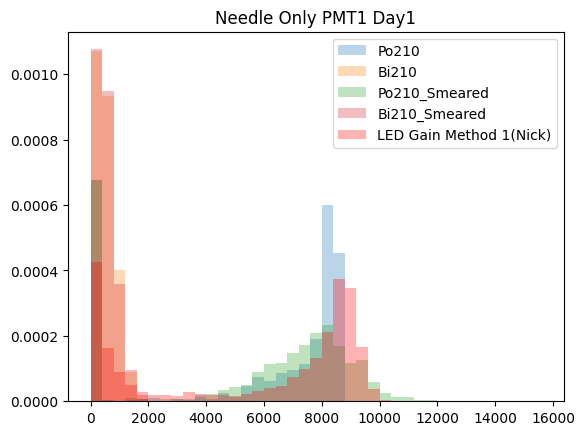

In [12]:
binss=np.arange(0,16000,400)

plt.title("Needle Only PMT1 Day1")

plt.hist(SimData["Needle"]["S1_PHOTOCATHODE"]["Po210"],bins=binss ,density=True,stacked=True,label="Po210",alpha=0.3)
plt.hist(SimData["Needle"]["S1_PHOTOCATHODE"]["Bi210"],bins=binss ,density=True,stacked=True,label="Bi210",alpha=0.3)
plt.hist(Po210_Smeared,bins=binss ,density=True,stacked=True,label="Po210_Smeared",alpha=0.3)
plt.hist(Bi210_Smeared,bins=binss ,density=True,stacked=True,label="Bi210_Smeared",alpha=0.3)


plt.hist(Day1_PMT1_GainNk,bins=binss,density=True,stacked=True,label="LED Gain Method 1(Nick)",color="r",alpha=0.3)
#plt.hist(Day1_PMT1_GainIL,bins=binss,density=True,stacked=True,label="LED Gain  Method 2(Ilker)",color="b",alpha=0.3)


#plt.hist(Day2_PMT1_GainNk,bins=binss,density=True,stacked=True,label="LED Gain Method 1(Nick)",color="r",alpha=0.3)
#plt.hist(Day2_PMT1_GainIL,bins=binss,density=True,stacked=True,label="LED Gain  Method 2(Ilker)",color="b",alpha=0.3)

plt.legend()
plt.show()


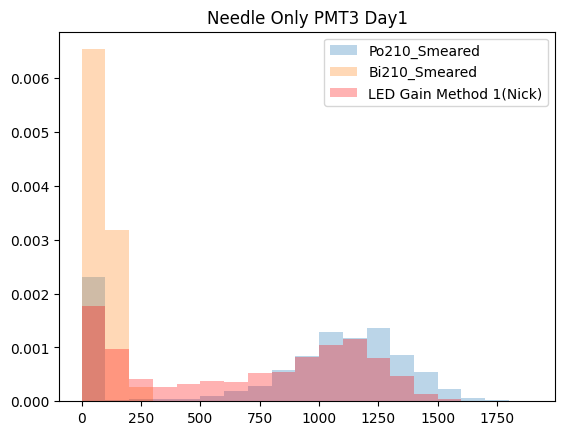

In [13]:


binss=np.arange(0,2000,100)

plt.title("Needle Only PMT3 Day1")


plt.hist(Po210_SmearedPMT3,bins=binss ,density=True,stacked=True,label="Po210_Smeared",alpha=0.3)
plt.hist(Bi210_SmearedPMT3,bins=binss ,density=True,stacked=True,label="Bi210_Smeared",alpha=0.3)


plt.hist(Day1_PMT3_GainNk,bins=binss,density=True,stacked=True,label="LED Gain Method 1(Nick)",color="r",alpha=0.3)
#plt.hist(Day1_PMT1_GainIL,bins=binss,density=True,stacked=True,label="LED Gain  Method 2(Ilker)",color="b",alpha=0.3)


#plt.hist(Day2_PMT1_GainNk,bins=binss,density=True,stacked=True,label="LED Gain Method 1(Nick)",color="r",alpha=0.3)
#plt.hist(Day2_PMT1_GainIL,bins=binss,density=True,stacked=True,label="LED Gain  Method 2(Ilker)",color="b",alpha=0.3)

plt.legend()
plt.show()


In [14]:
#plt.figure(figsize=(12,8),dpi=300)
#plt.title("Delta Function")

#h=plt.hist(Delta,bins=20 ,density=True,stacked=True,label="Delta",alpha=0.3)
#hsmeared=plt.hist(DeltaSmeared,bins=20 ,density=True,stacked=True,label="DeltaSmeared",alpha=0.3)

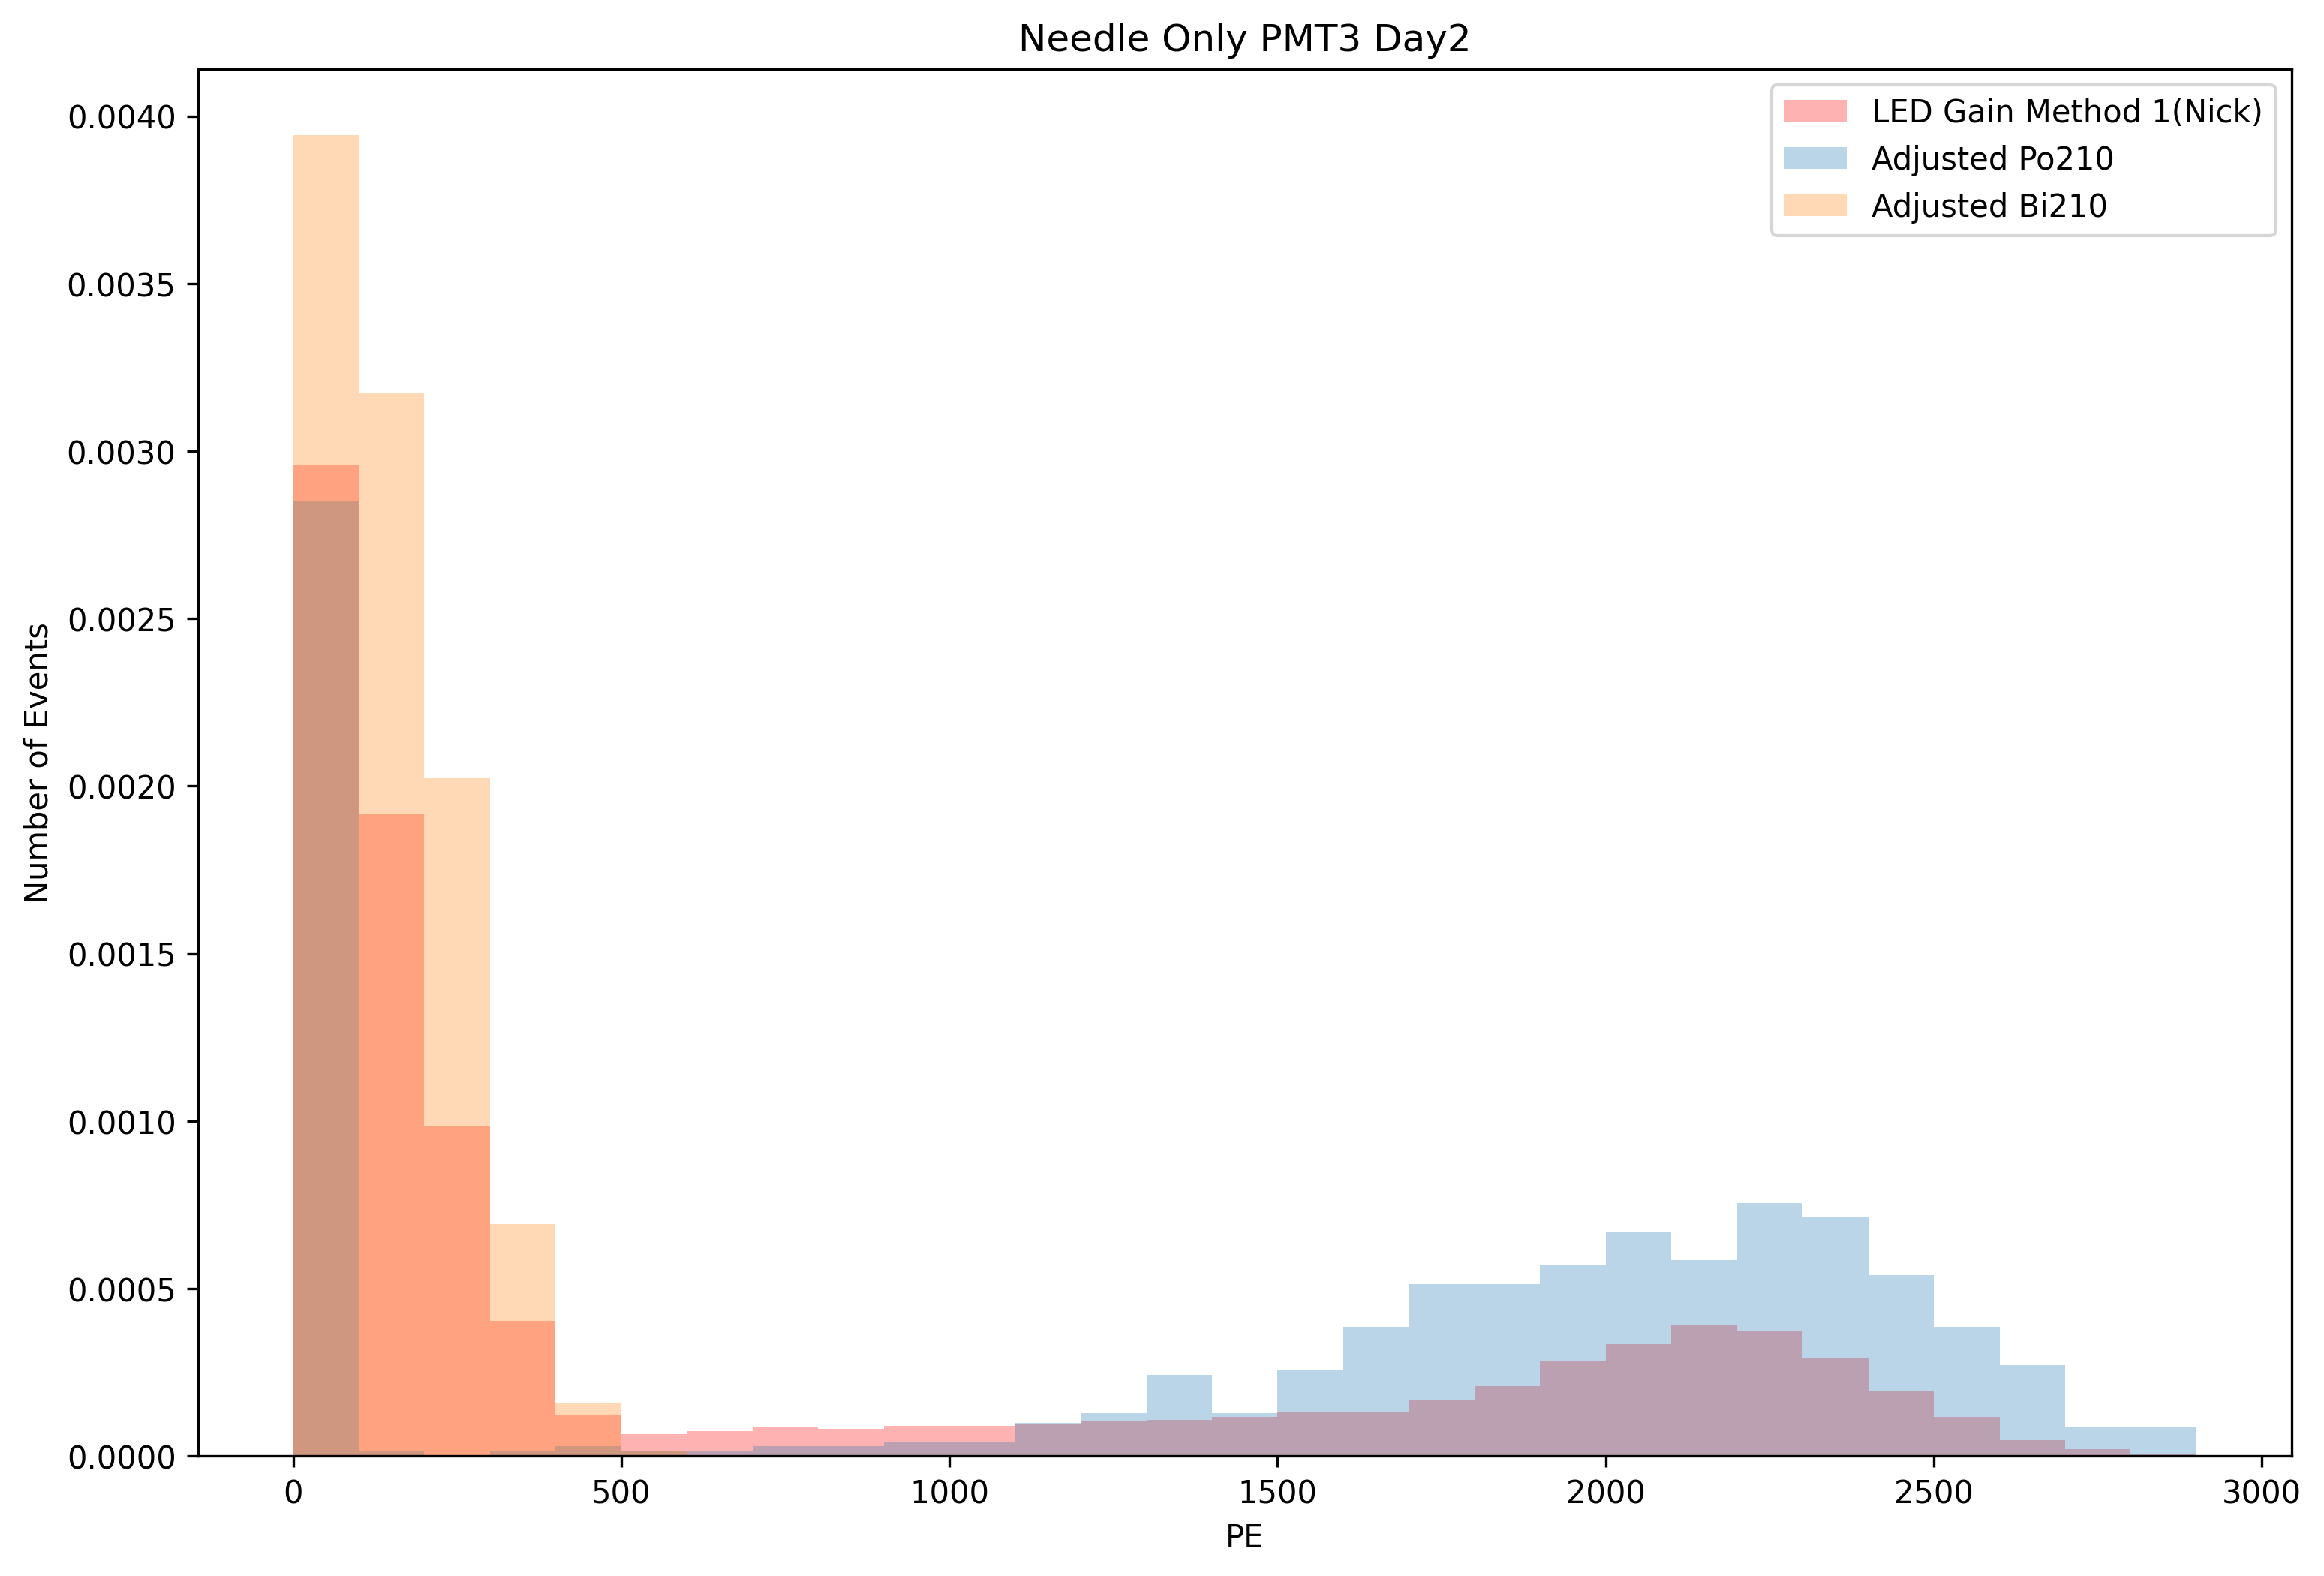

In [34]:
Po210_SmearedPMT3=np.random.normal(SimData["NeedleInfo"]["S2_PHOTOCATHODE"]["Po210"],SimData["NeedleInfo"]["S2_PHOTOCATHODE"]["Po210"]*0.14)
Bi210_SmearedPMT3=np.random.normal(SimData["NeedleInfo"]["S2_PHOTOCATHODE"]["Bi210"],SimData["NeedleInfo"]["S2_PHOTOCATHODE"]["Bi210"]*0.14)
binss=np.arange(0,3000,100)
plt.figure(figsize=(12,8),dpi=300)
plt.title("Needle Only PMT3 Day2")
plt.ylabel("Number of Events")
plt.xlabel("PE")
#plt.hist(Po210_SmearedPMT3,bins=binss ,density=True,stacked=True,label="Po210_Smeared",alpha=0.3)
#plt.hist(Bi210_SmearedPMT3,bins=binss ,density=True,stacked=True,label="Bi210_Smeared",alpha=0.3)
plt.hist(Day2_PMT3_GainNk,bins=binss,density=True,stacked=True,label="LED Gain Method 1(Nick)",color="r",alpha=0.3)

plt.hist(Po210_SmearedPMT3*0.30,bins=binss ,density=True,stacked=True,label="Adjusted Po210",alpha=0.3)
plt.hist(Bi210_SmearedPMT3*0.30,bins=binss ,density=True,stacked=True,label="Adjusted Bi210",alpha=0.3)
plt.legend()
plt.show()


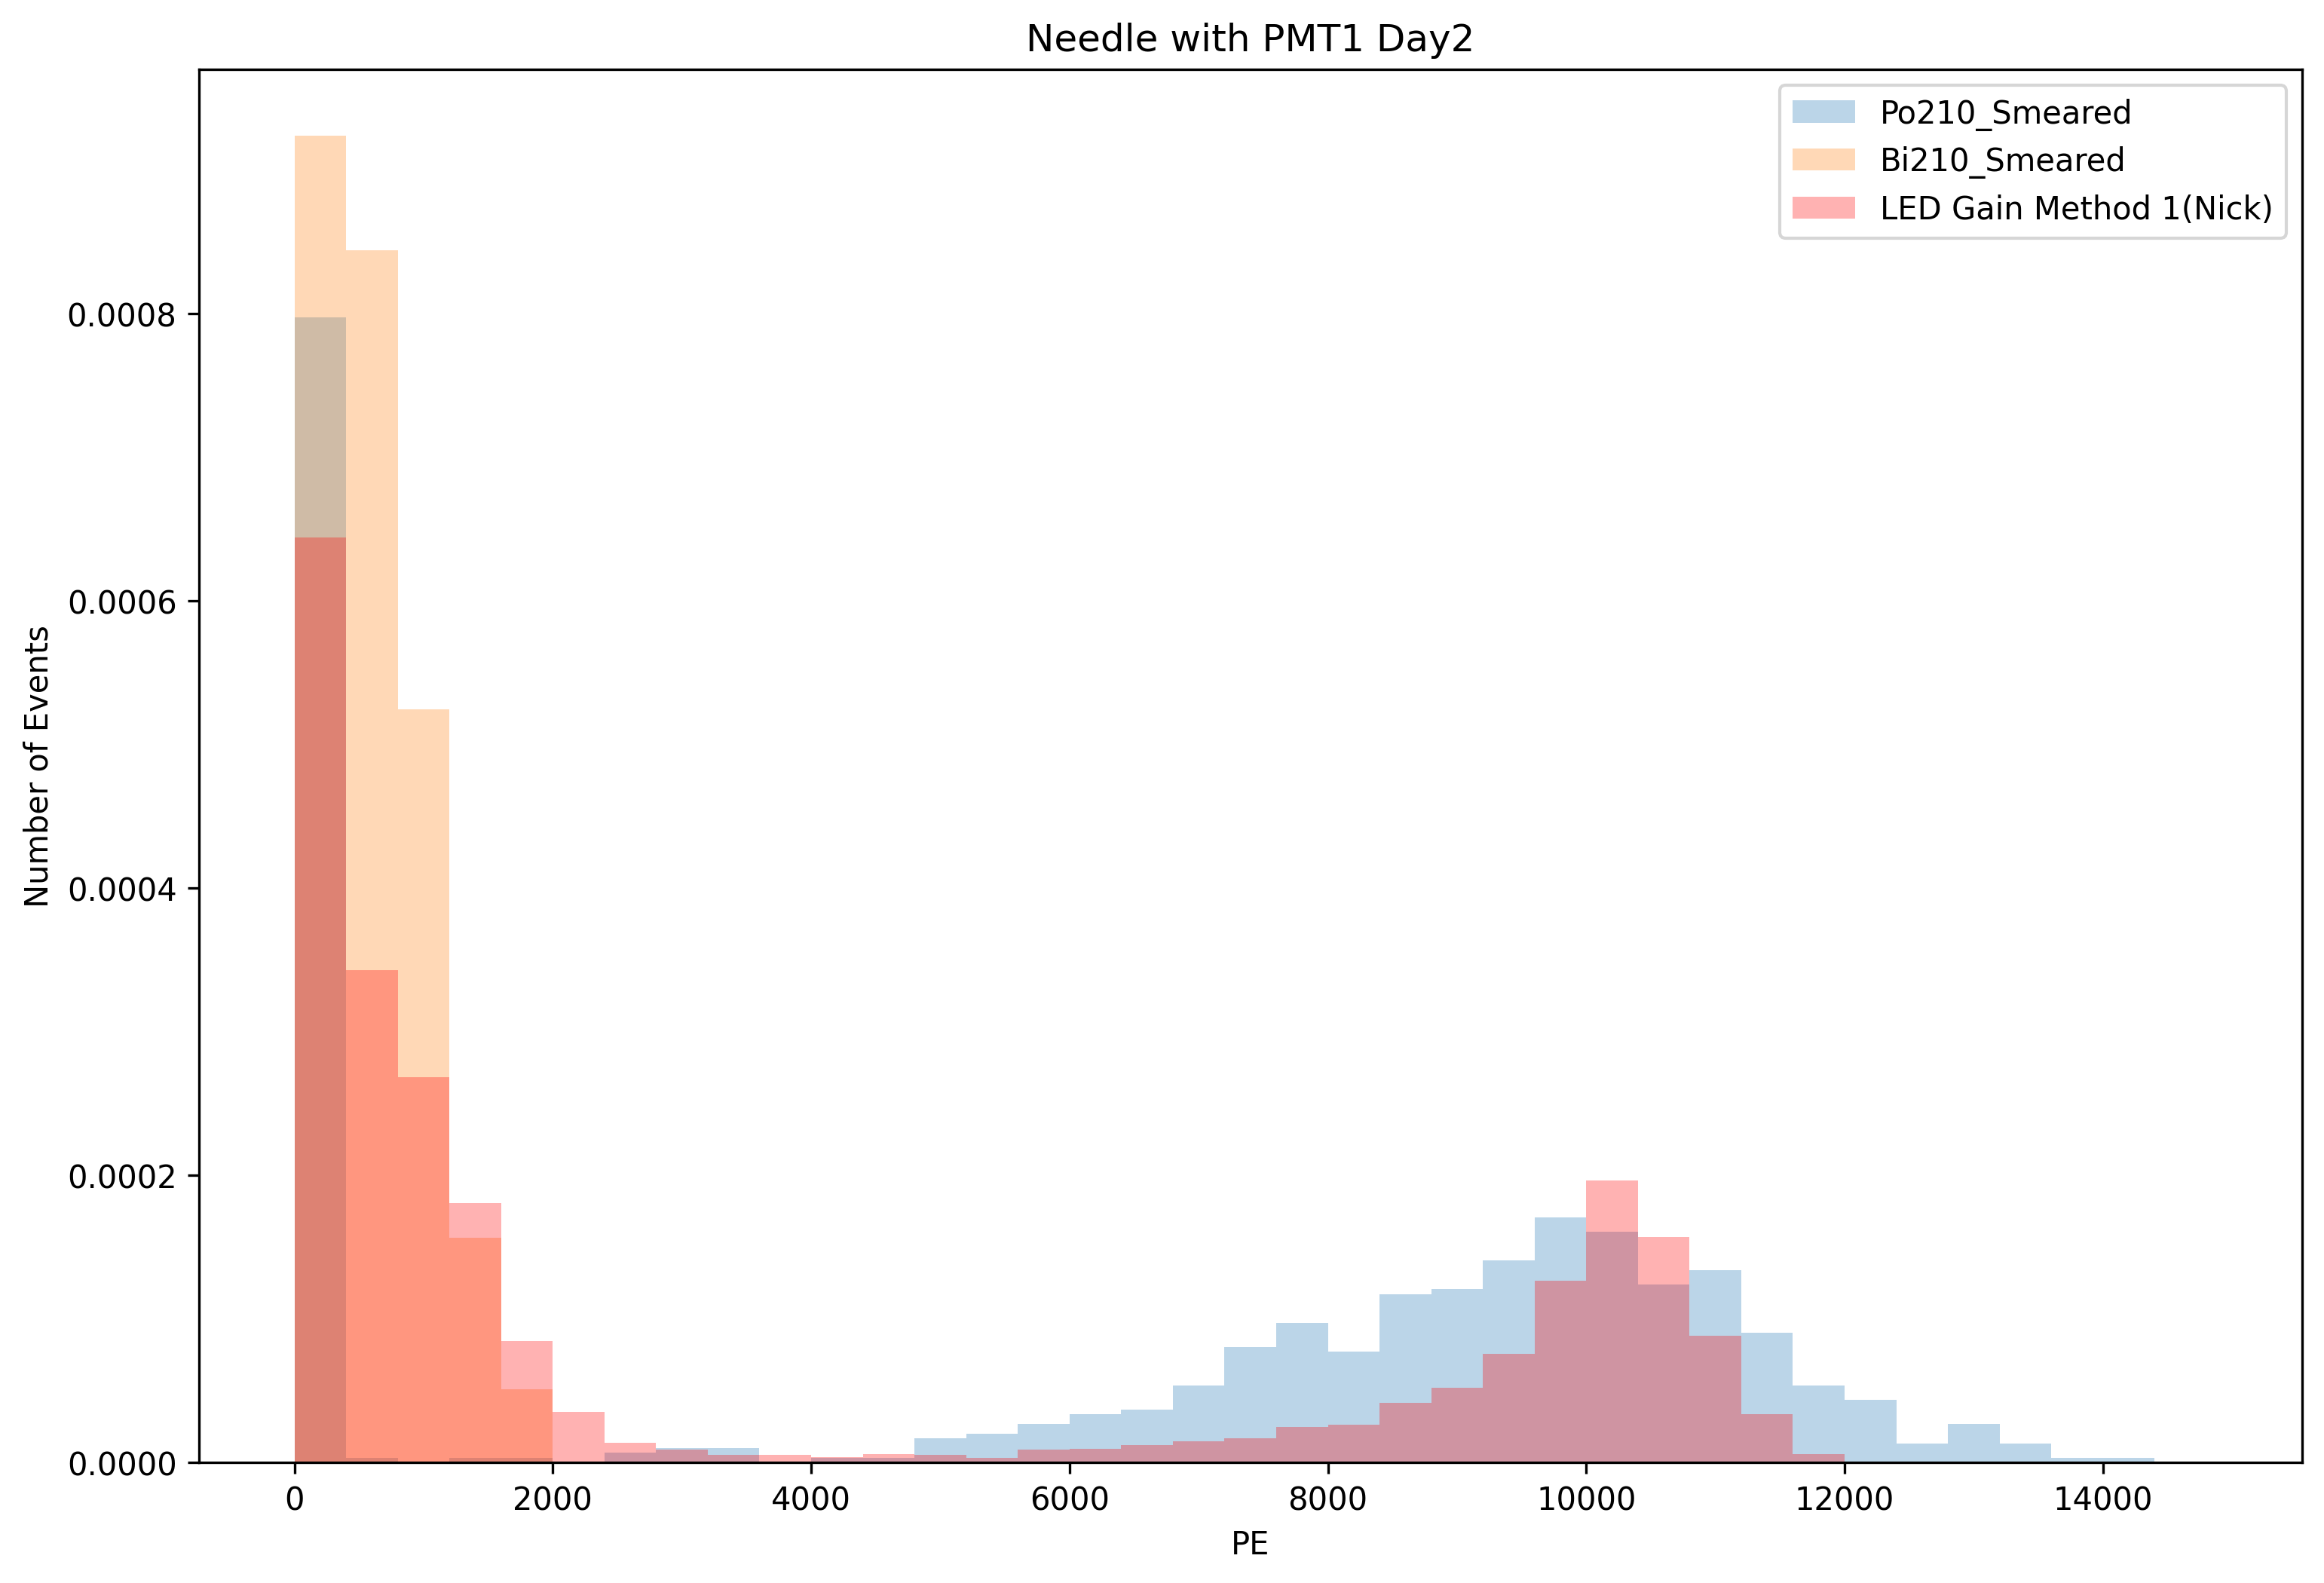

In [31]:
binss=np.arange(0,15000,400)
plt.figure(figsize=(12,8),dpi=300)
plt.title("Needle with PMT1 Day2")
plt.ylabel("Number of Events")
plt.xlabel("PE")
Po210_SmearedPMT1=np.random.normal(SimData["NeedleInfo"]["S1_PHOTOCATHODE"]["Po210"],SimData["NeedleInfo"]["S1_PHOTOCATHODE"]["Po210"]*0.14)
Bi210_SmearedPMT1=np.random.normal(SimData["NeedleInfo"]["S1_PHOTOCATHODE"]["Bi210"],SimData["NeedleInfo"]["S1_PHOTOCATHODE"]["Bi210"]*0.14)
#plt.hist(Po210_Smeared,bins=binss ,density=True,stacked=True,label="Po210_Smeared",alpha=0.3)
#plt.hist(Bi210_Smeared,bins=binss ,density=True,stacked=True,label="Bi210_Smeared",alpha=0.3)
plt.hist(Po210_SmearedPMT1*0.20,bins=binss ,density=True,stacked=True,label="Po210_Smeared",alpha=0.3)
plt.hist(Bi210_SmearedPMT1*0.20,bins=binss ,density=True,stacked=True,label="Bi210_Smeared",alpha=0.3)
plt.hist(Day2_PMT1_GainNk,bins=binss,density=True,stacked=True,label="LED Gain Method 1(Nick)",color="r",alpha=0.3)

plt.legend()
plt.show()

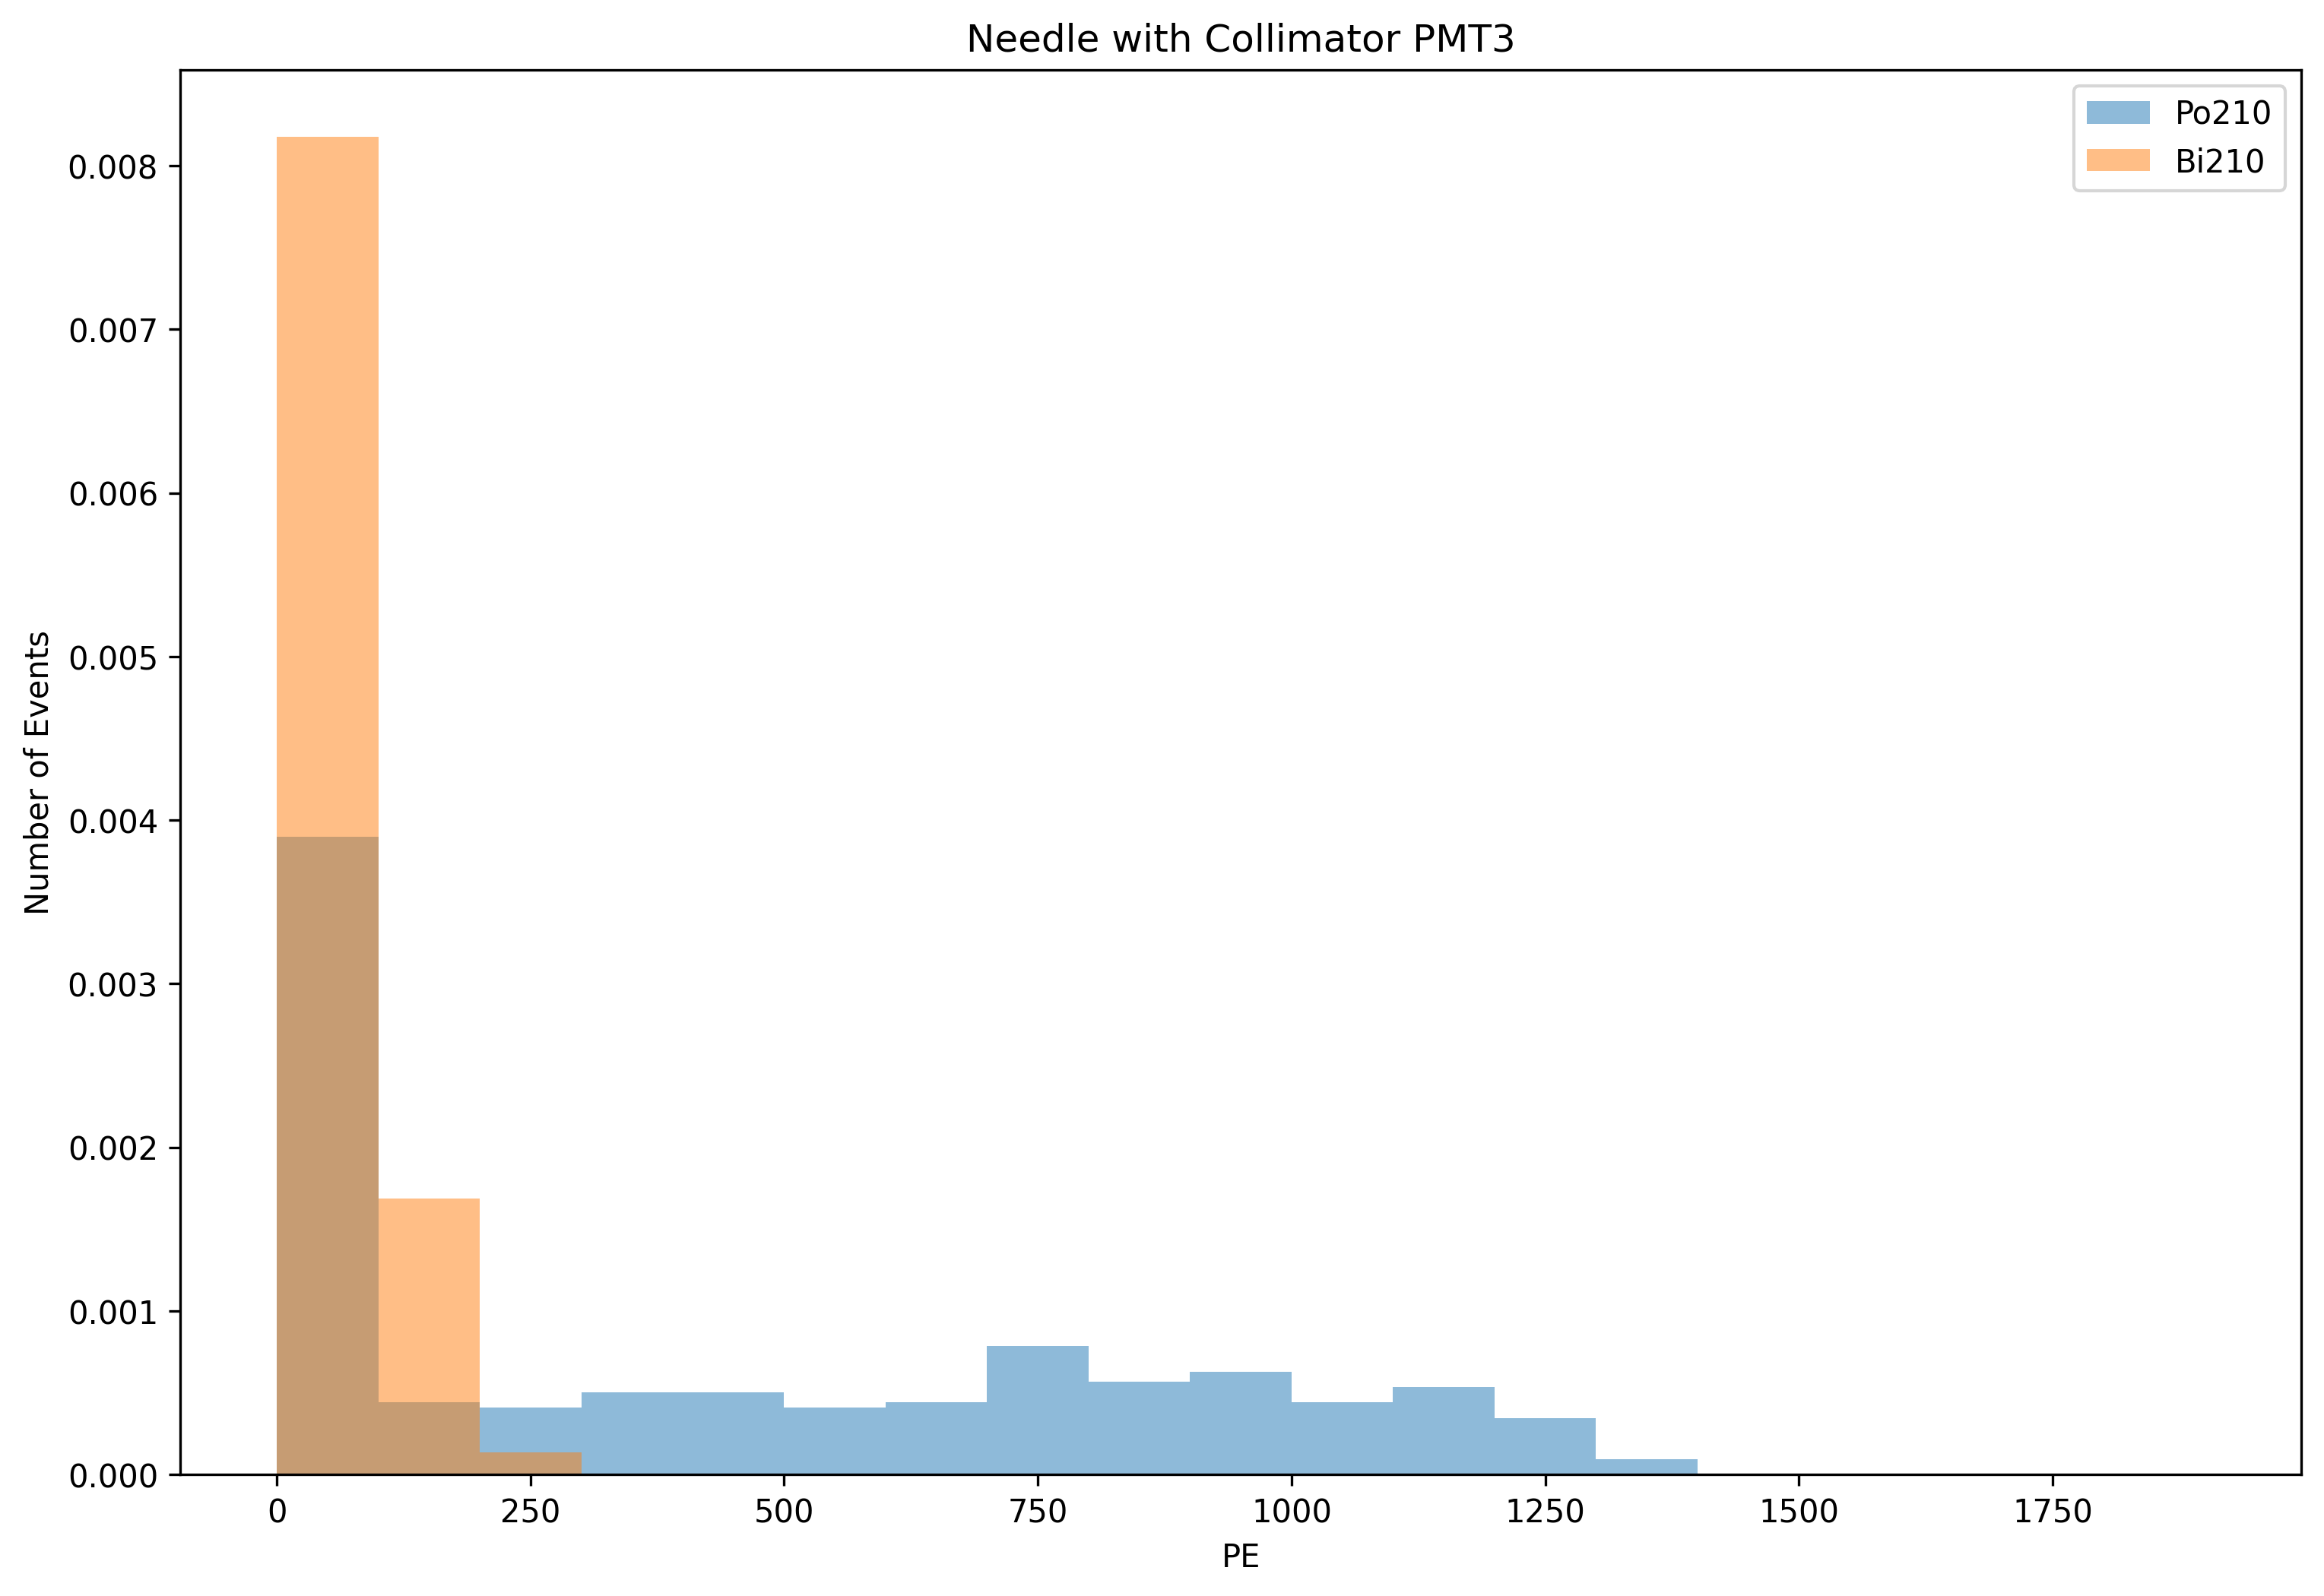

In [17]:
binss=np.arange(0,2000,100)
plt.figure(figsize=(12,8),dpi=300)
plt.title("Needle with Collimator PMT3")
plt.ylabel("Number of Events")
plt.xlabel("PE")
#plt.hist(Ch1AreaPENick[1],bins=binss,density=True,stacked=True,label="LED Gain Method 1(Nick)",color="r",alpha=0.5)
#plt.hist(Ch1AreaPEIlker[1],bins=binss,density=True,stacked=True,label="LED Gain  Method 2(Ilker)",color="b",alpha=0.5)

#plt.hist(S2_PMT1,bins=binss,density=True,stacked=True,label="GEANT4",color="g",alpha=0.5)
#plt.hist(S2_PMT1_Solid,bins=binss,density=True,stacked=True,label="Solid Angle",alpha=0.5)

#plt.hist(S2_Detailed["S2_PHOTOCATHODE"]["Bi210"],bins=binss ,density=True,stacked=True,label="Bi210(beta_[1.161MeV])_GEANT4",alpha=0.5)
#plt.hist(S2_Detailed["S2_PHOTOCATHODE"]["Po210"],bins=binss ,density=True,stacked=True,label="Pb210(Alpha_[5.3 MeV])_GEANT4",color="b",alpha=0.5)
#plt.hist(Ch1AreaPEIlker[1],bins=100,density=True,stacked=True,label="Ilker's Gain",color="b")

#plt.hist(Ch1AreaPEDrBrantdsLab[1],bins=binss,density=True,stacked=True,label="Gain From Dr Brandts lab",color="y")
plt.hist(SimData["NeedleColim"]["S2_PHOTOCATHODE"]["Po210"],bins=binss ,density=True,stacked=True,label="Po210",alpha=0.5)
plt.hist(SimData["NeedleColim"]["S2_PHOTOCATHODE"]["Bi210"],bins=binss ,density=True,stacked=True,label="Bi210",alpha=0.5)

#plt.hist(Day1_PMT3_GainNk,bins=binss,density=True,stacked=True,label="LED Gain Method 1(Nick)",color="r",alpha=0.3)
#plt.hist(Day1_PMT3_GainIL,bins=binss,density=True,stacked=True,label="LED Gain  Method 2(Ilker)",color="b",alpha=0.3)

plt.legend()
plt.show()